## Naive Bayes

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [2]:
df = pd.read_csv('data1.csv', header = None)

In [3]:
df = df[df.iloc[:,11]!='?']

In [4]:
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-atachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color', 'ring-number','ring-type','spore-print-color','population','habitat']

In [5]:
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])

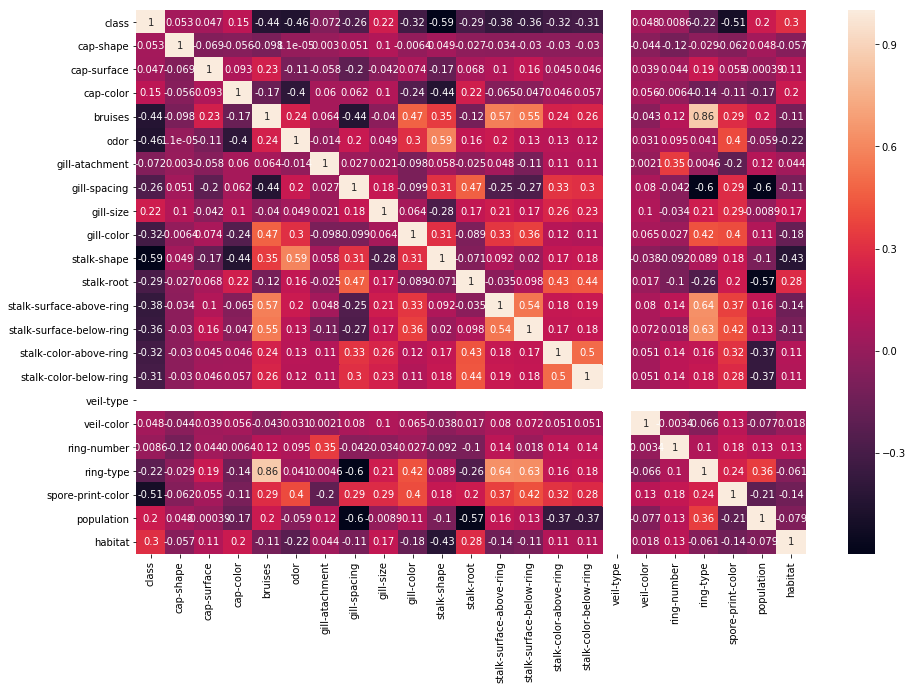

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

In [7]:
df_train, df_test = df.iloc[:4000,:], df.iloc[4000:,:]

In [8]:
prob_ones, prob_zeros = sum(df_train['class']==1)/4000, sum(df_train['class']==0)/4000

In [9]:
prob_ones, prob_zeros

(0.17275, 0.82725)

In [10]:
dict_prob = []

In [11]:
df_woclass = df.drop('class', axis =1)

In [12]:
for i in df_woclass.columns:
    count = df_woclass[i].unique()
    list_new = []
    count.sort()
    for j in range(len(count)):
        a = df_train[df_train[i]==count[j]]
        b = a[df_train['class']==1][i].count()
        list_new.append( (b +1)/sum(df_train['class']==1))
    dict_prob.append(list_new)

C:\Users\Rapt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [13]:
dict_prob_zeros =[]

In [14]:
for i in df_woclass.columns:
    count1 = df_woclass[i].unique()
    list_new1 = []
    count1.sort()
    for j in range(len(count1)):
        a = df_train[df_train[i]==count1[j]]
        b = a[df_train['class']==0][i].count()
        list_new1.append( (b +1)/sum(df_train['class']==0))
    dict_prob_zeros.append(list_new1)

C:\Users\Rapt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [15]:
X_test = df_test.iloc[:,1:].values
Y_test  = df_test.iloc[:,0].values


In [16]:
import math
pred = []
for i in range(len(X_test)):
    prob_pred_zero = 1
    prob_pred_one = 1
    for j in range(len(X_test[0])):
        prob_pred_zero = prob_pred_zero * dict_prob_zeros[j][X_test[i][j]]
        prob_pred_one = prob_pred_one * dict_prob[j][X_test[i][j]]
    prob_pred_one = prob_pred_one * prob_ones
    prob_pred_zero = prob_pred_zero * prob_zeros
    
    if prob_pred_zero > prob_pred_one:
        pred.append(0)
    else:
        pred.append(1)

In [17]:
pred

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, np.array(pred))


In [19]:
cm

array([[ 148,   31],
       [  96, 1369]], dtype=int64)

In [20]:
accuracy = (148 + 1369)/1644

In [21]:
accuracy

0.9227493917274939